# Airbnb Pricing Project -- Milan

### Prediction with Machine Learning for Economist - Assignment 2

### Amirhooshang Navaei - CEU , Fall 2023

* We start with importing the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.inspection import permutation_importance
# from sklearn.inspection import plot_partial_dependence
from sklearn.inspection import partial_dependence

### 1- Data Cleaning Process:
1.1. Loading the current dataset:

In [2]:
data = pd.read_csv('listings.csv')

data.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6400,https://www.airbnb.com/rooms/6400,20230913045258,2023-09-14,city scrape,Rental unit in Milan · ★4.89 · 3 bedrooms · 1 ...,"Enjoy your stay at The Studio, a light-filled ...",The neighborhood is quiet and very well connec...,https://a0.muscache.com/pictures/474737/5955ba...,13822,...,5.00,4.56,4.67,NaN,f,1,0,1,0,0.07
1,23986,https://www.airbnb.com/rooms/23986,20230913045258,2023-09-14,city scrape,Rental unit in Milan · ★4.64 · 1 bedroom · 1 b...,I look forward to welcoming you in my flat; it...,NaN,https://a0.muscache.com/pictures/623d63f8-56cf...,95941,...,4.73,4.69,4.46,NaN,f,1,1,0,0,0.19
2,1734055,https://www.airbnb.com/rooms/1734055,20230913045258,2023-09-14,city scrape,Rental unit in Milan · ★4.58 · 1 bedroom · 1 b...,"A cozy penthouse in China Town, just a few ste...","Milan’s Chinatown, known in Italian as Quartie...",https://a0.muscache.com/pictures/d1a8b813-f38c...,9134504,...,5.00,4.74,4.53,NaN,f,1,1,0,0,0.20
3,189441,https://www.airbnb.com/rooms/189441,20230913045258,2023-09-13,city scrape,Loft in Milano · ★4.70 · 1 bedroom · 1 bed · 1...,<b>The space</b><br />A lovely loft close to c...,NaN,https://a0.muscache.com/pictures/2768235/ce578...,913914,...,4.86,4.25,4.60,015146-LNI-00630,f,1,0,1,0,1.00
4,2192436,https://www.airbnb.com/rooms/2192436,20230913045258,2023-09-14,city scrape,Rental unit in Milan · ★4.85 · 1 bedroom · 1 b...,"Benvenuti nel nostro bel bilocale, situato n...","Il quartiere appare caldo, accogliente, vitale...",https://a0.muscache.com/pictures/ad16d0e0-9ac1...,11180301,...,4.95,4.79,4.76,NaN,t,1,1,0,0,1.47


* We add an ID column ('new_data') to distinguish the current dataset from December dataset.

In [3]:
# Adding the ID column to the dataframe
data['new_data'] = 1

### December Dataset - Testing the trained models on an older dataset:

* To ensure that both datasets have the same format and can be used to train models, we load the December dataset and assign it a different ID. 
* This way, we can apply the same cleaning process on both datasets. 
* In the final step of data cleaning, we use this key to separate the datasets and remove the ID column.

In [4]:
# loading the Decemeber 2022 dataset
data2 = pd.read_csv('listings-Dec2022.csv')

# adding the ID column to December dataframe
data2['new_data'] = 0

* Merging 2 datasets:

In [5]:
# merging the two data frames
data = pd.concat([data, data2])

# checking the shape of the new data frame
data.shape

(43108, 76)

### Dropping the unnecessary columns

* The following columns appear highly correlated to other features or uninformative for our problem.

In [6]:
drop_cols = ['id', 'listing_url', 'scrape_id', 'last_scraped','source', 'description', 'neighborhood_overview',
              'picture_url', 'host_id','host_url', 'host_name', 'host_total_listings_count','host_since',
              'host_location','host_verifications' ,'host_about','host_is_superhost' ,'host_thumbnail_url',
              'host_picture_url','host_neighbourhood', 'neighbourhood', 'neighbourhood_group_cleansed',
              'latitude', 'longitude', 'bathrooms', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
              'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm',
              'maximum_nights_avg_ntm', 'calendar_updated', 'availability_60', 'availability_90', 'availability_365', 
              'calendar_last_scraped', 'first_review', 'last_review', 'number_of_reviews_ltm', 'review_scores_accuracy',
              'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'number_of_reviews_l30d',
              'host_listings_count', 'review_scores_location', 'review_scores_value', 'license', 'calculated_host_listings_count',
              'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 
              'calculated_host_listings_count_shared_rooms']

data = data.drop(drop_cols, axis=1)
data.shape

(43108, 22)

In [138]:
data.head()

,accommodates,bedrooms,beds,price,availability_30,number_of_reviews,review_scores_rating,reviews_per_month,new_data,bathrooms,...,Wifi \u2013 16 Mbps,Wifi \u2013 17 Mbps,Wifi \u2013 26 Mbps,Wifi \u2013 28 Mbps,Wifi \u2013 8 Mbps,Window AC unit,Wine glasses,X shampoo,Xx refrigerator,biologico body soap
1,4,1.00,1.00,150.00,23,26,4.64,0.19,1,1.00,...,0,0,0,0,0,0,0,0,0,0
1,4,1.00,1.00,150.00,23,26,4.64,0.19,1,1.00,...,0,0,0,0,0,0,0,0,0,0
1,4,1.00,1.00,150.00,28,22,4.57,0.17,0,1.00,...,0,0,0,0,0,0,0,0,0,0
1,4,1.00,1.00,150.00,28,22,4.57,0.17,0,1.00,...,0,0,0,0,0,0,0,0,0,0
2,2,1.00,1.00,171.00,24,20,4.58,0.20,1,1.00,...,0,0,0,0,0,0,0,0,0,0


### Checking for missing values:

In [8]:
# Data Cleaning
# check for missing values
data.isnull().sum()

name                          7
host_response_time        11095
host_response_rate        11095
host_acceptance_rate       8030
host_has_profile_pic          0
host_identity_verified        0
neighbourhood_cleansed        0
property_type                 0
room_type                     0
accommodates                  0
bathrooms_text               24
bedrooms                   6847
beds                        555
amenities                     0
price                         0
has_availability              0
availability_30               0
number_of_reviews             0
review_scores_rating       8392
instant_bookable              0
reviews_per_month          8392
new_data                      0
dtype: int64

* It seems that there are a lot of missing values for number of the "bedrooms" which could be an important feature. 
* The good point is that we can extract the number of bedrooms from the column "name". 

In [9]:
# Extracting number of bedrooms from the name column
data['num_bedrooms'] = data['name'].str.extract('(\d+) bedroom', expand=True)

# checking for missing values in the new column
data['num_bedrooms'].isnull().sum()

20253

* Since the number of missing values for the new column is less than the previous column, we can replace the missing value of the original column with the new feature values.

In [10]:
# Replacing the missing values in column "bedrooms" with the values in column "num_bedrooms"
data['bedrooms'] = data['bedrooms'].fillna(data['num_bedrooms'])

# checking for missing values in the "bedrooms" column
data['bedrooms'].isnull().sum()

2869

In [11]:
# dropping the "num_bedrooms" column
data = data.drop('num_bedrooms', axis=1)

In [12]:
# dropping the rows with missing values in the "bedrooms" column
data = data.dropna(subset=['bedrooms'])

* It does not seem that these 3 variables are very esseintial to our model: "host_response_time", "host_response_rate", "host_acceptance_rate".
* Considering the number of missing values for these columns, a trivial choice is to drop them as well. 

In [13]:
# Dropping the columns: "host_response_time", "host_response_rate", "host_acceptance_rate"
data = data.drop(['host_response_time', 'host_response_rate', 'host_acceptance_rate'], axis=1)

In [14]:
# dropping the rows with missing values in the "beds" and "bathrooms_text" columns
data = data.dropna(subset=['beds', 'bathrooms_text'])

* A closer look to the data shows that, the 0 ratings could be equivalent to missing values. 
* If the number of these observations is limited, we can drop them all. Otherwise we need to replace them with the mean.

In [15]:
# Checking for the number of observations with review_scores_rating = 0
data[data['review_scores_rating'] == 0].shape

(318, 19)

In [16]:
# dropping the rows with review_scores_rating = 0
data = data[data['review_scores_rating'] != 0]

In [17]:
# checking the statistics of the "review_scores_rating" column
data['review_scores_rating'].describe()

count    31669.000000
mean         4.685539
std          0.464426
min          1.000000
25%          4.580000
50%          4.830000
75%          5.000000
max          5.000000
Name: review_scores_rating, dtype: float64

* It seems plausible to replace the missing values with the mean.

In [18]:
# replacing the missing values in the "review_scores_rating" column with the mean
data['review_scores_rating'] = data['review_scores_rating'].fillna(data['review_scores_rating'].mean())

# replacing the missing values in the "reviews_per_month" column with the mean
data['reviews_per_month'] = data['reviews_per_month'].fillna(data['reviews_per_month'].mean())

In [19]:
data.isnull().sum()

name                      6
host_has_profile_pic      0
host_identity_verified    0
neighbourhood_cleansed    0
property_type             0
room_type                 0
accommodates              0
bathrooms_text            0
bedrooms                  0
beds                      0
amenities                 0
price                     0
has_availability          0
availability_30           0
number_of_reviews         0
review_scores_rating      0
instant_bookable          0
reviews_per_month         0
new_data                  0
dtype: int64

In [20]:
# Dropping the column "name" - we have extracted all the information we need from it
data = data.drop('name', axis=1)

### Encoding Categorical Variables

In [21]:
# Checking the data types of the columns
data.dtypes

host_has_profile_pic       object
host_identity_verified     object
neighbourhood_cleansed     object
property_type              object
room_type                  object
accommodates                int64
bathrooms_text             object
bedrooms                   object
beds                      float64
amenities                  object
price                      object
has_availability           object
availability_30             int64
number_of_reviews           int64
review_scores_rating      float64
instant_bookable           object
reviews_per_month         float64
new_data                    int64
dtype: object

* These variables are categorical and need to be converted: 
"host_has_profile_pic", "host_identity_verified", 'neighbourhood_cleansed', 'property_type', 'room_type', 'has_availability', 'instant_bookable'

In [22]:
# Converting the above columns to categorical variables
data['host_has_profile_pic'] = data['host_has_profile_pic'].astype('category')
data['host_identity_verified'] = data['host_identity_verified'].astype('category')
data['neighbourhood_cleansed'] = data['neighbourhood_cleansed'].astype('category')
data['room_type'] = data['room_type'].astype('category')
data['has_availability'] = data['has_availability'].astype('category')
data['instant_bookable'] = data['instant_bookable'].astype('category')
data['property_type'] = data['property_type'].astype('category')

In [23]:
data.head()

,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,has_availability,availability_30,number_of_reviews,review_scores_rating,instant_bookable,reviews_per_month,new_data
0,t,f,TIBALDI,Private room in rental unit,Private room,1,3.5 baths,3,1.0,"[""Washer"", ""Kitchen"", ""Paid parking on premise...",$100.00,t,23,12,4.89,f,0.07,1
1,t,t,NAVIGLI,Entire rental unit,Entire home/apt,4,1 bath,1.0,1.0,"[""Hot water"", ""Washer"", ""Bed linens"", ""Extra p...",$150.00,t,23,26,4.64,f,0.19,1
2,t,t,SARPI,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.0,"[""Dishwasher"", ""Heating"", ""Hangers"", ""Dryer"", ...",$171.00,t,24,20,4.58,f,0.20,1
3,t,t,BOVISASCA,Private room in loft,Private room,1,1 shared bath,1.0,1.0,"[""HDTV with Netflix"", ""Dishwasher"", ""Heating"",...",$40.00,t,13,142,4.70,f,1.00,1
4,t,t,TORTONA,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.0,"[""Heating"", ""Shower gel"", ""Hangers"", ""Room-dar...",$94.00,t,1,169,4.85,t,1.47,1


In [24]:
data.dtypes

host_has_profile_pic      category
host_identity_verified    category
neighbourhood_cleansed    category
property_type             category
room_type                 category
accommodates                 int64
bathrooms_text              object
bedrooms                    object
beds                       float64
amenities                   object
price                       object
has_availability          category
availability_30              int64
number_of_reviews            int64
review_scores_rating       float64
instant_bookable          category
reviews_per_month          float64
new_data                     int64
dtype: object

* These 3 columns need to be converted to numeric type: "bathrooms_text", "bedrooms", "price"

In [25]:
data['bathrooms_text'].head()

0        3.5 baths
1           1 bath
2           1 bath
3    1 shared bath
4           1 bath
Name: bathrooms_text, dtype: object

In [26]:
# Extracting the number of bathrooms from the "bathrooms_text" column
data['bathrooms'] = data['bathrooms_text'].str.extract('(\d+) ', expand=True)

# Converting the "bathrooms" column to numeric
data['bathrooms'] = pd.to_numeric(data['bathrooms'])

# Dropping the "bathrooms_text" column
data = data.drop('bathrooms_text', axis=1)

# Converting the "bedrooms" column to numeric
data['bedrooms'] = pd.to_numeric(data['bedrooms'])

In [27]:
data['price'].head()

0    $100.00
1    $150.00
2    $171.00
3     $40.00
4     $94.00
Name: price, dtype: object

In [28]:
# Extracting the numberic part from the "price" column
data['price'] = data['price'].str.replace('$', '')
data['price'] = data['price'].str.replace(',', '')
data['price'] = pd.to_numeric(data['price'])

C:\Users\PA\AppData\Local\Temp\ipykernel_14104\528802465.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['price'] = data['price'].str.replace('$', '')


In [29]:
data.shape

(39395, 18)

In [30]:
# Convering the categorical variables to dummy variables
data = pd.get_dummies(data, columns= ['host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed', 'room_type', 'has_availability','instant_bookable', 'property_type'] ,drop_first=True)

In [31]:
# Store the cleaned data in a new dataframe
data_cleaned = data.copy()

data.shape

(39395, 156)

* The "amenities" column include several strings which every one of them can be considered as a dummy.

In [32]:
data['amenities'].head()

0    ["Washer", "Kitchen", "Paid parking on premise...
1    ["Hot water", "Washer", "Bed linens", "Extra p...
2    ["Dishwasher", "Heating", "Hangers", "Dryer", ...
3    ["HDTV with Netflix", "Dishwasher", "Heating",...
4    ["Heating", "Shower gel", "Hangers", "Room-dar...
Name: amenities, dtype: object

In [33]:
# The "amenities" column include several strings which every one of them can be considered as a dummy.
# Convert the 'amenities' column from a string representation of a list to an actual list
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
data['amenities'] = data['amenities'].str.strip('[]').str.replace('"', '').str.split(',')
data = data.join(pd.DataFrame(mlb.fit_transform(data.pop('amenities')),
                                columns=mlb.classes_,
                                index=data.index))

### Filtering the data based on the number of the guests

In [34]:
# Filtering the data based on "accommodates" between 2 and 6
data = data[(data['accommodates'] >= 2) & (data['accommodates'] <= 6)]


In [35]:
# Removing the columns without proper names
data = data.drop(['', ' '], axis=1)

In [36]:
data.shape

(64618, 4223)

In [37]:
# storing the cleaned data in a new dataframe
data_cleaned_2 = data.copy()

### Dropping the columns with more than 99% zeros
* As we can see our dataset has 3788 columns now; which makes the computations very costly.
* On the other hand, for a lot of amenities we have only one active (1) observation.
* It makes sense to omit these columns. Not only this procedure makes the computations more efficient, it also increase the accuracy of the models.

In [38]:
# checking the percentage of zeros in each column
data_zero = (data == 0).astype(int).sum(axis=0)
data_zero = data_zero/data.shape[0]
data_zero = data_zero.sort_values(ascending=False)

# Checking the number of columns with more than 99% zeros
data_zero[data_zero > 0.99].shape[0]

3997

In [39]:
data.price.describe(percentiles = [0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99]).map('{:,.1f}'.format)

count    64,618.0
mean        186.7
std       1,210.0
min           9.0
1%           30.0
10%          56.0
25%          79.0
50%         110.0
75%         171.0
90%         272.0
99%         950.0
max      90,180.0
Name: price, dtype: object

In [40]:
# Dropping the observations with a price higher than 1000
data = data[data['price'] <= 1000]

In [41]:
data.shape

(64225, 4223)

C:\Users\PA\AppData\Local\Temp\ipykernel_14104\82555254.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['price'])


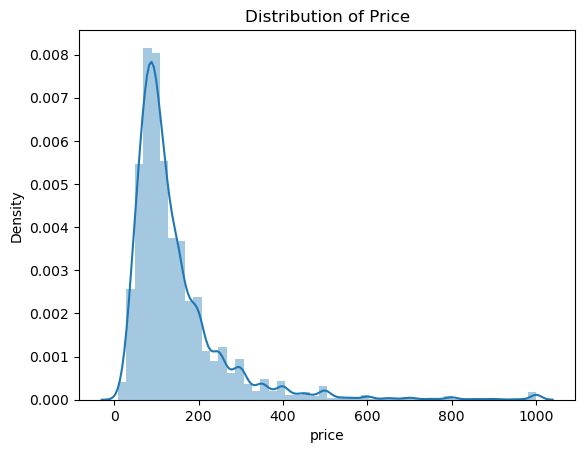

In [42]:
# Checking the distribution of the target variable
sns.distplot(data['price'])
plt.title('Distribution of Price')
plt.show()

### Deleting the observations with missing values

In [43]:
# checking the missing values
sum(data.isnull().sum())

51

In [44]:
# dropping the rows with missing values
data = data.dropna()


In [44]:
"""# Storing the cleaned data in a new csv file
data.to_csv('data_cleaned_2.csv', index=False)"""

"# Storing the cleaned data in a new csv file\ndata.to_csv('data_cleaned_2.csv', index=False)"

In [45]:
# Dropping the columns with more than 99% zeros
data_2 = data.drop(data_zero[data_zero > 0.99].index, axis=1)

In [46]:
data_2.shape, data.shape

((64174, 226), (64174, 4223))

In [47]:
# Seperating the new and old data using the column "new_data"
data_new = data_2[data_2['new_data'] == 1]
data_dec = data_2[data_2['new_data'] == 0]

In [48]:
# Dropping the "new_data" column
data_new = data_new.drop('new_data', axis=1)
data_dec = data_dec.drop('new_data', axis=1)

In [49]:
data_new.shape, data_dec.shape

((34523, 225), (29651, 225))

# Splitting Data:
1. Target variable and the features
2. Test and Train Sets

In [50]:
# Splitting target variable and predictors
X = data_new.drop('price', axis=1)
y = data_new['price']

In [51]:
# Splitting target variable and predictors for the Dec data
X_dec = data_dec.drop('price', axis=1)
y_dec = data_dec['price']

In [52]:
from sklearn.model_selection import train_test_split

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=122)

* For linear regression it is necessary to scale the data.

In [53]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
# Scaling the new data
X_dec_scaled = scaler.transform(X_dec)

# Models

In [55]:
# Preparing some lists to store the results
models = []
Train_RMSE = []
Test_RMSE = []
Dec_RMSE = []

## LASSO - Feature Selection

* We have lots of features, which probably many of them are not important and deterministic in price prediction.
* We implement LASSO in the first step, to omit the unnecessary features.
* Then we run an OLS model on the remaining features.

In [56]:
# Avoiding the ConvergenceWarning
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

# implementing the LASSO method with the optimal regularization parameter
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

# Lasso- Parameter tuning using cross validation
alphas = np.logspace(-6, 2, 20)
lasso_cv = LassoCV(alphas=alphas, cv=5)
lasso_cv.fit(X_train_scaled, y_train)

# Stoing the best lambda value
selected_alpha = lasso_cv.alpha_
print("Best lambda value: ", selected_alpha)

warnings.resetwarnings()

Best lambda value:  0.2976351441631313


In [57]:
# Define the LASSO model using the best parameter
best_lasso_model = Lasso(alpha=selected_alpha)
best_lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=0.2976351441631313)

In [58]:
# Checking the number of non-zero coefficients of the LASSO model
print("Number of non-zero coefficients: ", np.sum(best_lasso_model.coef_ != 0))

Number of non-zero coefficients:  177


In [59]:
# getting the features from the LASSO model that have a non-zero coefficient
selected_features = X.columns[best_lasso_model.coef_ != 0]
selected_features

Index(['accommodates', 'bedrooms', 'beds', 'availability_30',
       'number_of_reviews', 'review_scores_rating', 'reviews_per_month',
       'bathrooms', 'host_has_profile_pic_t', 'host_identity_verified_t',
       ...
       'Gas stove', 'Heating', 'Hot water', 'Kitchen', 'Lock on bedroom door',
       'Lockbox', 'Outdoor dining area', 'Pets allowed', 'Single level home',
       'Wifi'],
      dtype='object', length=177)

In [60]:
# Choosing training and testing sets based on the selected features
X_train_selected = X_train_scaled[:, best_lasso_model.coef_ != 0]
X_test_selected = X_test_scaled[:, best_lasso_model.coef_ != 0]

In [61]:
# choosing the same features for the new data
X_dec_selected = X_dec_scaled[:, best_lasso_model.coef_ != 0]

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Creating a linear regression model
ols_model = LinearRegression()

# Fitting the model
ols_model.fit(X_train_selected, y_train)

# Checking the model performance on the training data
y_train_pred = ols_model.predict(X_train_selected)
ols_train_mse = mean_squared_error(y_train, y_train_pred)
ols_train_rmse = np.sqrt(ols_train_mse)
ols_train_mae = np.mean(np.abs(y_train - y_train_pred))
ols_train_r2 = ols_model.score(X_train_selected, y_train)
print('Training MSE:', ols_train_mse, '\n', 'Training RMSE:', ols_train_rmse,
      '\n', 'Training MAE:', ols_train_mae, '\n', 'Training R2:', ols_train_r2)

# Checking the model performance on the test data
y_test_pred = ols_model.predict(X_test_selected)
ols_test_mse = mean_squared_error(y_test, y_test_pred)
ols_test_rmse = np.sqrt(ols_test_mse)
ols_test_mae = np.mean(np.abs(y_test - y_test_pred))
ols_test_r2 = ols_model.score(X_test_selected, y_test)
print('Test MSE:', ols_test_mse, '\n', 'Test RMSE:', ols_test_rmse,
      '\n', 'Test MAE:', ols_test_mae, '\n', 'Test R2:', ols_test_r2)

Training MSE: 11693.017626354165 
 Training RMSE: 108.13425741343104 
 Training MAE: 63.52748495643979 
 Training R2: 0.2713758232954284
Test MSE: 11969.003751985085 
 Test RMSE: 109.40294215415362 
 Test MAE: 64.50016742925675 
 Test R2: 0.2686102118935104


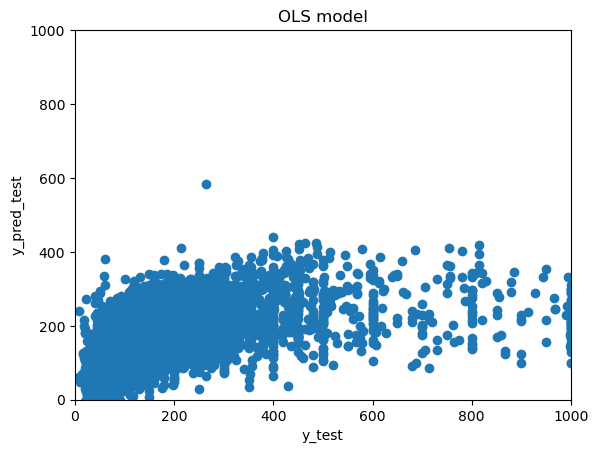

In [64]:
# Plotting the results of OLS prediction
plt.scatter(y_test, y_test_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred_test')
plt.xlim(0, 1000)
plt.ylim(0, 1000)
plt.title('OLS model')
plt.show()

In [65]:
# Checking the model performance on the new data
y_new_pred = ols_model.predict(X_dec_selected)
ols_new_mse = mean_squared_error(y_dec, y_new_pred)
ols_new_rmse = np.sqrt(ols_new_mse)
ols_new_mae = np.mean(np.abs(y_dec - y_new_pred))
ols_new_r2 = ols_model.score(X_dec_selected, y_dec)
print('New MSE:', ols_new_mse, '\n', 'New RMSE:', ols_new_rmse,
      '\n', 'New MAE:', ols_new_mae, '\n', 'New R2:', ols_new_r2)

New MSE: 10485.766158609305 
 New RMSE: 102.40003007133008 
 New MAE: 71.70088309606817 
 New R2: 0.08985104716857395


In [66]:
# Recording the results
models.append('OLS')
Train_RMSE.append(ols_train_rmse)
Test_RMSE.append(ols_test_rmse)
Dec_RMSE.append(ols_new_rmse)

# Decision Tree Regression Model

In [67]:
from sklearn.tree import DecisionTreeRegressor
# Creating a decision tree regression model
dtree_model = DecisionTreeRegressor(random_state=42)

# Fitting the model to the training data
dtree_model.fit(X_train, y_train)

# Checking the model performance on the training data
y_train_pred = dtree_model.predict(X_train)
dtree_train_mse = mean_squared_error(y_train, y_train_pred)
dtree_train_rmse = np.sqrt(dtree_train_mse)
dtree_train_mae = np.mean(np.abs(y_train - y_train_pred))
dtree_train_r2 = dtree_model.score(X_train, y_train)
print('Training MSE:', dtree_train_mse, '\n', 'Training RMSE:', dtree_train_rmse,
      '\n', 'Training MAE:', dtree_train_mae, '\n', 'Training R2:', dtree_train_r2)

# Checking the model performance on the test data
y_test_pred = dtree_model.predict(X_test)
dtree_test_mse = mean_squared_error(y_test, y_test_pred)
dtree_test_rmse = np.sqrt(dtree_test_mse)
dtree_test_mae = np.mean(np.abs(y_test - y_test_pred))
dtree_test_r2 = dtree_model.score(X_test, y_test)
print('Test MSE:', dtree_test_mse, '\n', 'Test RMSE:', dtree_test_rmse,
      '\n', 'Test MAE:', dtree_test_mae, '\n', 'Test R2:', dtree_test_r2)

Training MSE: 0.31022924770338495 
 Training RMSE: 0.5569822687513355 
 Training MAE: 0.00860713398990317 
 Training R2: 0.9999806687599881
Test MSE: 19529.116636091534 
 Test RMSE: 139.74661583055072 
 Test MAE: 72.31176981751473 
 Test R2: -0.19336552768721238


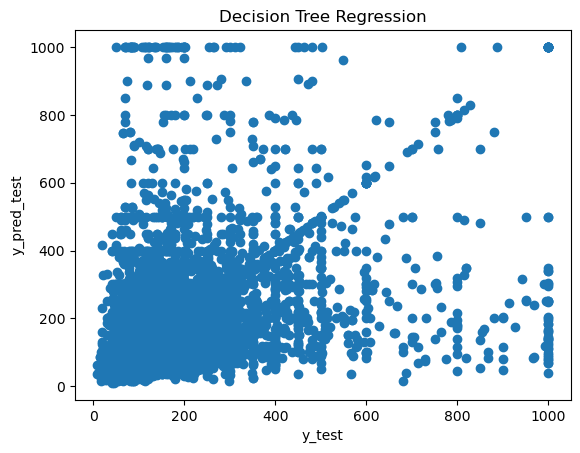

In [68]:
# Plotting the results from the default regression tree model
plt.scatter(y_test, y_test_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred_test')
plt.title('Decision Tree Regression')
plt.show()

In [69]:
# Checking the model performance on the new data
y_new_pred = dtree_model.predict(X_dec)
dtree_new_mse = mean_squared_error(y_dec, y_new_pred)
dtree_new_rmse = np.sqrt(dtree_new_mse)
dtree_new_mae = np.mean(np.abs(y_dec - y_new_pred))
dtree_new_r2 = dtree_model.score(X_dec, y_dec)
print('New MSE:', dtree_new_mse, '\n', 'New RMSE:', dtree_new_rmse,
      '\n', 'New MAE:', dtree_new_mae, '\n', 'New R2:', dtree_new_r2)

New MSE: 20235.122701591852 
 New RMSE: 142.2502116047349 
 New MAE: 77.71338538329229 
 New R2: -0.7563786430758845


In [70]:
# Recording the results
models.append('Decision Tree - Default')
Train_RMSE.append(dtree_train_rmse)
Test_RMSE.append(dtree_test_rmse)
Dec_RMSE.append(dtree_new_rmse)

In [71]:
# defining the grid of parameters
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'max_depth': np.arange(3, 20), 'min_samples_leaf': np.arange(5, 20), 'min_samples_split': np.arange(5, 20)}

# defining the model
dtree_model_cv = DecisionTreeRegressor(random_state=42)

# defining the random search
dtree_cv = RandomizedSearchCV(dtree_model_cv, param_grid, cv = 5)

# fitting the model to the training data
dtree_cv.fit(X_train, y_train)
# storing the best parameters
best_params = dtree_cv.best_params_

# printing the best parameters
print("Tuned Decision Tree Parameters: {}".format(best_params))

Tuned Decision Tree Parameters: {'min_samples_split': 13, 'min_samples_leaf': 19, 'max_depth': 11}


In [72]:
# Creating a decision tree regression model with the best parameters
dtree_model_best = DecisionTreeRegressor(random_state=42, **best_params)

# Fitting the model to the training data
dtree_model_best.fit(X_train, y_train)

# Checking the model performance on the training data
y_train_pred = dtree_model_best.predict(X_train)
dtree_tuned_train_mse = mean_squared_error(y_train, y_train_pred)
dtree_tuned_train_rmse = np.sqrt(dtree_tuned_train_mse)
dtree_tuned_train_mae = np.mean(np.abs(y_train - y_train_pred))
dtree_tuned_train_r2 = dtree_model_best.score(X_train, y_train)
print('Training MSE:', dtree_tuned_train_mse, '\n', 'Training RMSE:', dtree_tuned_train_rmse,
      '\n', 'Training MAE:', dtree_tuned_train_mae, '\n', 'Training R2:', dtree_tuned_train_r2)

# Checking the model performance on the test data
y_test_pred = dtree_model_best.predict(X_test)
dtree_tuned_test_mse = mean_squared_error(y_test, y_test_pred)
dtree_tuned_test_rmse = np.sqrt(dtree_tuned_test_mse)
dtree_tuned_test_mae = np.mean(np.abs(y_test - y_test_pred))
dtree_tuned_test_r2 = dtree_model_best.score(X_test, y_test)
print('Test MSE:', dtree_tuned_test_mse, '\n', 'Test RMSE:', dtree_tuned_test_rmse,
      '\n', 'Test MAE:', dtree_tuned_test_mae, '\n', 'Test R2:', dtree_tuned_test_r2)

Training MSE: 10283.367885389363 
 Training RMSE: 101.40694199801788 
 Training MAE: 60.12728276026353 
 Training R2: 0.3592149863560711
Test MSE: 12088.866742964694 
 Test RMSE: 109.94938264021629 
 Test MAE: 64.61242267614324 
 Test R2: 0.2612857453471743


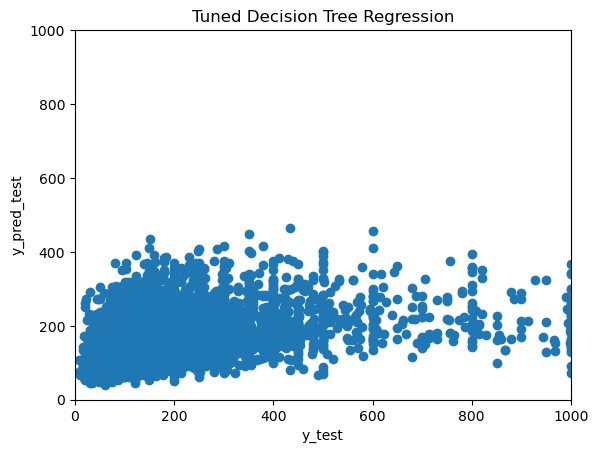

In [87]:
# Plotting the results from the Tuned regression tree model
plt.scatter(y_test, y_test_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred_test')
plt.xlim(0, 1000)
plt.ylim(0, 1000)
plt.title('Tuned Decision Tree Regression')
plt.show()

In [74]:
# Checking the model performance on the new data
y_new_pred = dtree_model_best.predict(X_dec)
dtree_tuned_new_mse = mean_squared_error(y_dec, y_new_pred)
dtree_tuned_new_rmse = np.sqrt(dtree_tuned_new_mse)
dtree_tuned_new_mae = np.mean(np.abs(y_dec - y_new_pred))
dtree_tuned_new_r2 = dtree_model_best.score(X_dec, y_dec)
print('New MSE:', dtree_tuned_new_mse, '\n', 'New RMSE:', dtree_tuned_new_rmse,
      '\n', 'New MAE:', dtree_tuned_new_mae, '\n', 'New R2:', dtree_tuned_new_r2)

New MSE: 10655.867744465491 
 New RMSE: 103.2272626027906 
 New MAE: 69.10860361196939 
 New R2: 0.07508648176627764


In [75]:
# Recording the results
models.append('Decision Tree - Tuned')
Train_RMSE.append(dtree_tuned_train_rmse)
Test_RMSE.append(dtree_tuned_test_rmse)
Dec_RMSE.append(dtree_tuned_new_rmse)

# K-Nearest Neighbors (KNN) Regression

In [76]:
# Creating a KNN regression model
from sklearn.neighbors import KNeighborsRegressor


knn_model = KNeighborsRegressor()

# Fitting the model to the training data
knn_model.fit(X_train, y_train)

# Checking the model performance on the training data
y_train_pred = knn_model.predict(X_train)
knn_train_mse = mean_squared_error(y_train, y_train_pred)
knn_train_rmse = np.sqrt(knn_train_mse)
knn_train_mae = np.mean(np.abs(y_train - y_train_pred))
knn_train_r2 = knn_model.score(X_train, y_train)
print('Training MSE:', knn_train_mse, '\n', 'Training RMSE:', knn_train_rmse,
      '\n', 'Training MAE:', knn_train_mae, '\n', 'Training R2:', knn_train_r2)

# Checking the model performance on the test data
y_test_pred = knn_model.predict(X_test)
knn_test_mse = mean_squared_error(y_test, y_test_pred)
knn_test_rmse = np.sqrt(knn_test_mse)
knn_test_mae = np.mean(np.abs(y_test - y_test_pred))
knn_test_r2 = knn_model.score(X_test, y_test)
print('Test MSE:', knn_test_mse, '\n', 'Test RMSE:', knn_test_rmse,
      '\n', 'Test MAE:', knn_test_mae, '\n', 'Test R2:', knn_test_r2)

Training MSE: 8917.095871886122 
 Training RMSE: 94.43037579024094 
 Training MAE: 56.96293139121079 
 Training R2: 0.44435116358628446
Test MSE: 13770.791144153713 
 Test RMSE: 117.34901424449083 
 Test MAE: 70.47552380032828 
 Test R2: 0.15850840841194713


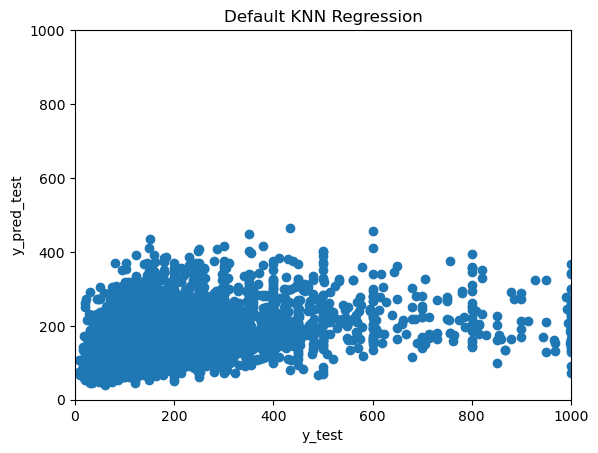

In [86]:
# Plotting the results from the Default KNN model
plt.scatter(y_test, y_test_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred_test')
plt.xlim(0, 1000)
plt.ylim(0, 1000)
plt.title('Default KNN Regression')
plt.show()

In [78]:
# Checking the model performance on the new data
y_new_pred = knn_model.predict(X_dec)
knn_new_mse = mean_squared_error(y_dec, y_new_pred)
knn_new_rmse = np.sqrt(knn_new_mse)
knn_new_mae = np.mean(np.abs(y_dec - y_new_pred))
knn_new_r2 = knn_model.score(X_dec, y_dec)
print('New MSE:', knn_new_mse, '\n', 'New RMSE:', knn_new_rmse,
      '\n', 'New MAE:', knn_new_mae, '\n', 'New R2:', knn_new_r2)

New MSE: 11542.145270948704 
 New RMSE: 107.43437657914112 
 New MAE: 70.96030926444301 
 New R2: -0.0018410932382850742


In [79]:
# Recording the results
models.append('KNN - Default')
Train_RMSE.append(knn_train_rmse)
Test_RMSE.append(knn_test_rmse)
Dec_RMSE.append(knn_new_rmse)

# Tuned KNN Regression

In [80]:
# defining the grid of parameters
param_grid = {'n_neighbors': np.arange(1, 20), 'weights': ['uniform', 'distance']}

# defining the model
knn_model_cv = KNeighborsRegressor()

# defining the random search
knn_cv = RandomizedSearchCV(knn_model_cv, param_grid, cv = 5)

# fitting the model to the training data
knn_cv.fit(X_train, y_train)

# storing the best parameters
best_params = knn_cv.best_params_

In [79]:
# printing the best parameters
print("Tuned KNN Parameters: {}".format(best_params))

Tuned KNN Parameters: {'weights': 'distance', 'n_neighbors': 19}


In [81]:
# Creating a KNN regression model with the best parameters
knn_model_best = KNeighborsRegressor(**best_params)
# Fitting the model to the training data
knn_model_best.fit(X_train, y_train)

# Checking the model performance on the training data
y_train_pred = knn_model_best.predict(X_train)
knn_tuned_train_mse = mean_squared_error(y_train, y_train_pred)
knn_tuned_train_rmse = np.sqrt(knn_tuned_train_mse)
knn_tuned_train_mae = np.mean(np.abs(y_train - y_train_pred))
knn_tuned_train_r2 = knn_model_best.score(X_train, y_train)
print('Training MSE:', knn_tuned_train_mse, '\n', 'Training RMSE:', knn_tuned_train_rmse,
      '\n', 'Training MAE:', knn_tuned_train_mae, '\n', 'Training R2:', knn_tuned_train_r2)

# Checking the model performance on the test data
y_test_pred = knn_model_best.predict(X_test)
knn_tuned_test_mse = mean_squared_error(y_test, y_test_pred)
knn_tuned_test_rmse = np.sqrt(knn_tuned_test_mse)
knn_tuned_test_mae = np.mean(np.abs(y_test - y_test_pred))
knn_tuned_test_r2 = knn_model_best.score(X_test, y_test)
print('Test MSE:', knn_tuned_test_mse, '\n', 'Test RMSE:', knn_tuned_test_rmse,
      '\n', 'Test MAE:', knn_tuned_test_mae, '\n', 'Test R2:', knn_tuned_test_r2)

Training MSE: 0.31022924849081673 
 Training RMSE: 0.5569822694582088 
 Training MAE: 0.008610481261846057 
 Training R2: 0.9999806687599391
Test MSE: 13333.438313914627 
 Test RMSE: 115.47050841628189 
 Test MAE: 68.76309045674881 
 Test R2: 0.1852337232722826


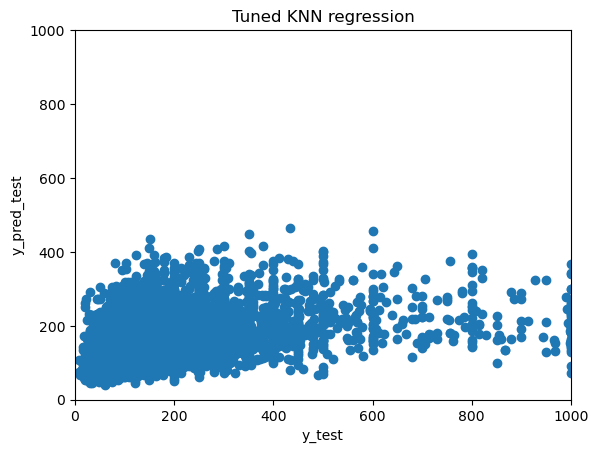

In [88]:
# Plotting the results from the Tuned KNN model
plt.scatter(y_test, y_test_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred_test')
plt.xlim(0, 1000)
plt.ylim(0, 1000)
plt.title('Tuned KNN regression')
plt.show()

In [89]:
# Checking the model performance on the new data
y_new_pred = knn_model_best.predict(X_dec)
knn_tuned_new_mse = mean_squared_error(y_dec, y_new_pred)
knn_tuned_new_rmse = np.sqrt(knn_tuned_new_mse)
knn_tuned_new_mae = np.mean(np.abs(y_dec - y_new_pred))
knn_tuned_new_r2 = knn_model_best.score(X_dec, y_dec)
print('New MSE:', knn_tuned_new_mse, '\n', 'New RMSE:', knn_tuned_new_rmse,
      '\n', 'New MAE:', knn_tuned_new_mae, '\n', 'New R2:', knn_tuned_new_r2)

New MSE: 10159.177614713231 
 New RMSE: 100.79274584370262 
 New MAE: 68.26402480925799 
 New R2: 0.11819844846835414


In [90]:
# Recording the results
models.append('KNN - Tuned')
Train_RMSE.append(knn_tuned_train_rmse)
Test_RMSE.append(knn_tuned_test_rmse)
Dec_RMSE.append(knn_tuned_new_rmse)

# Model 5: Random Forest Regression

In [91]:
# Creating a random forest regression model
from sklearn.ensemble import RandomForestRegressor


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fitting the model to the training data
rf_model.fit(X_train, y_train)

# Checking the model performance on the training data
y_train_pred = rf_model.predict(X_train)
rf_train_mse = mean_squared_error(y_train, y_train_pred)
rf_train_rmse = np.sqrt(rf_train_mse)
rf_train_mae = np.mean(np.abs(y_train - y_train_pred))
rf_train_r2 = rf_model.score(X_train, y_train)
print('Training MSE:', rf_train_mse, '\n', 'Training RMSE:', rf_train_rmse, '\n', 'Training MAE:', rf_train_mae, '\n', 'Training R2:', rf_train_r2)

# Checking the model performance on the test data
y_test_pred = rf_model.predict(X_test)
rf_test_mse = mean_squared_error(y_test, y_test_pred)
rf_test_rmse = np.sqrt(rf_test_mse)
rf_test_mae = np.mean(np.abs(y_test - y_test_pred))
rf_test_r2 = rf_model.score(X_test, y_test)
print('Test MSE:', rf_test_mse, '\n', 'Test RMSE:', rf_test_rmse, '\n', 'Test MAE:', rf_test_mae, '\n', 'Test R2:', rf_test_r2)

Training MSE: 1384.4101599388214 
 Training RMSE: 37.20766265084144 
 Training MAE: 20.912220737123782 
 Training R2: 0.91373358484183
Test MSE: 9549.811772754492 
 Test RMSE: 97.72313836934676 
 Test MAE: 55.51975539892504 
 Test R2: 0.4164397510717339


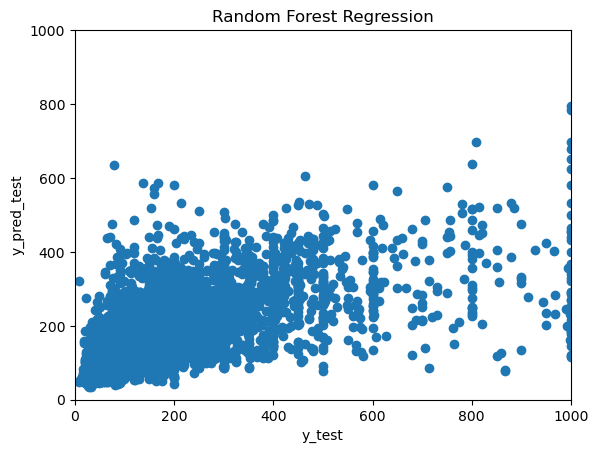

In [92]:
# Plotting the results from the Random Forest model
plt.scatter(y_test, y_test_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred_test')
plt.xlim(0, 1000)
plt.ylim(0, 1000)
plt.title('Random Forest Regression')
plt.show()

In [93]:
# Checking the model performance on the new data
y_new_pred = rf_model.predict(X_dec)
rf_new_mse = mean_squared_error(y_dec, y_new_pred)
rf_new_rmse = np.sqrt(rf_new_mse)
rf_new_mae = np.mean(np.abs(y_dec - y_new_pred))
rf_new_r2 = rf_model.score(X_dec, y_dec)
print('New MSE:', rf_new_mse, '\n', 'New RMSE:', rf_new_rmse, '\n', 'New MAE:', rf_new_mae, '\n', 'New R2:', rf_new_r2)


New MSE: 8990.196424761363 
 New RMSE: 94.81664634842008 
 New MAE: 63.83235791372972 
 New R2: 0.2196642822301318


In [94]:
# Recording the results
models.append('Random Forest - Default')
Train_RMSE.append(rf_train_rmse)
Test_RMSE.append(rf_test_rmse)
Dec_RMSE.append(rf_new_rmse)

In [95]:
# defining the grid of parameters
from sklearn.model_selection import GridSearchCV


param_grid = {"max_features": ['sqrt'], "min_samples_leaf": [5, 10, 15]}

# defining the model
rf_model_cv = RandomForestRegressor(random_state=42)
# defining the random search
rf_cv = GridSearchCV(rf_model_cv, param_grid, cv = 5)

# fitting the model to the training data
rf_cv.fit(X_train, y_train)

# storing the best parameters
best_params = rf_cv.best_params_

# printing the best parameters
print("Tuned Random Forest Parameters: {}".format(best_params))

Tuned Random Forest Parameters: {'max_features': 'sqrt', 'min_samples_leaf': 5}


In [96]:
# Creating a random forest regression model with the best parameters
# best_params = {'n_estimators': 210, 'max_features': 'sqrt', 'bootstrap': False}

rf_model_best = RandomForestRegressor(**best_params)

# Fitting the model to the training data
rf_model_best.fit(X_train, y_train)

# Checking the model performance on the training data
y_train_pred = rf_model_best.predict(X_train)
rf_tuned_train_mse = mean_squared_error(y_train, y_train_pred)
rf_tuned_train_rmse = np.sqrt(rf_tuned_train_mse)
rf_tuned_train_mae = np.mean(np.abs(y_train - y_train_pred))
rf_tuned_train_r2 = rf_model_best.score(X_train, y_train)
print('Training MSE:', rf_tuned_train_mse, '\n', 'Training RMSE:', rf_tuned_train_rmse,
      '\n', 'Training MAE:', rf_tuned_train_mae, '\n', 'Training R2:', rf_tuned_train_r2)

# Checking the model performance on the test data
y_test_pred = rf_model_best.predict(X_test)
rf_tuned_test_mse = mean_squared_error(y_test, y_test_pred)
rf_tuned_test_rmse = np.sqrt(rf_tuned_test_mse)
rf_tuned_test_mae = np.mean(np.abs(y_test - y_test_pred))
rf_tuned_test_r2 = rf_model_best.score(X_test, y_test)
print('Test MSE:', rf_tuned_test_mse, '\n', 'Test RMSE:', rf_tuned_test_rmse,
      '\n', 'Test MAE:', rf_tuned_test_mae, '\n', 'Test R2:', rf_tuned_test_r2)

Training MSE: 8547.18880068924 
 Training RMSE: 92.45100756989747 
 Training MAE: 53.23973495710611 
 Training R2: 0.4674010933666488
Test MSE: 11568.332212553532 
 Test RMSE: 107.55618165662787 
 Test MAE: 62.701404312054514 
 Test R2: 0.29309404349700063


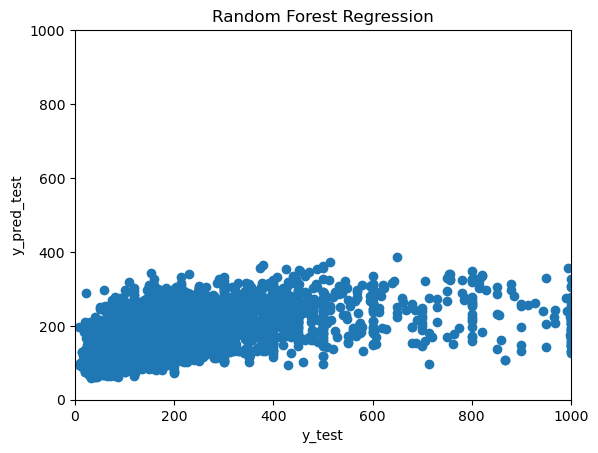

In [97]:
# Plotting the results from the Tuned Random Forest model
plt.scatter(y_test, y_test_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred_test')
plt.xlim(0, 1000)
plt.ylim(0, 1000)
plt.title('Random Forest Regression')
plt.show()

In [98]:
# Checking the model performance on the new data
y_new_pred = rf_model_best.predict(X_dec)
rf_tuned_new_mse = mean_squared_error(y_dec, y_new_pred)
rf_tuned_new_rmse = np.sqrt(rf_tuned_new_mse)
rf_tuned_new_mae = np.mean(np.abs(y_dec - y_new_pred))
rf_tuned_new_r2 = rf_model_best.score(X_dec, y_dec)
print('New MSE:', rf_tuned_new_mse, '\n', 'New RMSE:', rf_tuned_new_rmse,
      '\n', 'New MAE:', rf_tuned_new_mae, '\n', 'New R2:', rf_tuned_new_r2)

New MSE: 8819.56800924444 
 New RMSE: 93.9125551204121 
 New MAE: 64.77662753026266 
 New R2: 0.23447457566572483


In [99]:
# Recording the results
models.append('Random Forest - Tuned')
Train_RMSE.append(rf_tuned_train_rmse)
Test_RMSE.append(rf_tuned_test_rmse)
Dec_RMSE.append(rf_tuned_new_rmse)

# Model 6: GBM

In [100]:
# Creating a gradient boosting regression model
from sklearn.ensemble import GradientBoostingRegressor

GBM_model = GradientBoostingRegressor(random_state=42)

# Fitting the model to the training data
GBM_model.fit(X_train, y_train)

# Checking the model performance on the training data
y_train_pred = GBM_model.predict(X_train)
GBM_train_mse = mean_squared_error(y_train, y_train_pred)
GBM_train_rmse = np.sqrt(GBM_train_mse)
GBM_train_mae = np.mean(np.abs(y_train - y_train_pred))
GBM_train_r2 = GBM_model.score(X_train, y_train)
print('Training MSE:', GBM_train_mse, '\n', 'Training RMSE:', GBM_train_rmse,
      '\n', 'Training MAE:', GBM_train_mae, '\n', 'Training R2:', GBM_train_r2)

# Checking the model performance on the test data
y_test_pred = GBM_model.predict(X_test)
GBM_test_mse = mean_squared_error(y_test, y_test_pred)
GBM_test_rmse = np.sqrt(GBM_test_mse)
GBM_test_mae = np.mean(np.abs(y_test - y_test_pred))
GBM_test_r2 = GBM_model.score(X_test, y_test)
print('Test MSE:', GBM_test_mse, '\n', 'Test RMSE:', GBM_test_rmse,
      '\n', 'Test MAE:', GBM_test_mae, '\n', 'Test R2:', GBM_test_r2)

Training MSE: 10422.886296726458 
 Training RMSE: 102.09253790912663 
 Training MAE: 59.38911923595245 
 Training R2: 0.3505212093650484
Test MSE: 11168.025215773232 
 Test RMSE: 105.67887781280245 
 Test MAE: 60.629227471231836 
 Test R2: 0.31755559899648234


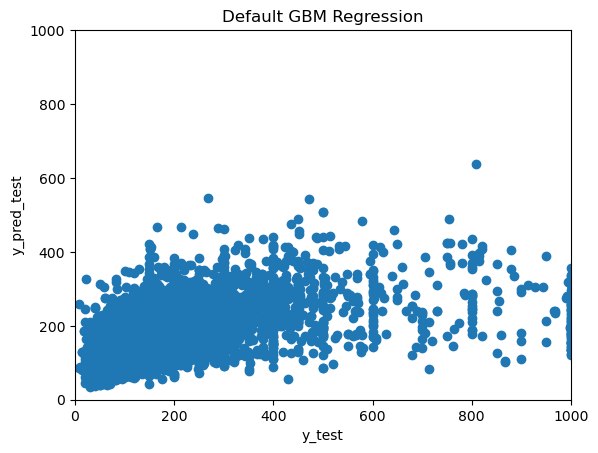

In [101]:
# Plotting the results from the Default GBM model
plt.scatter(y_test, y_test_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred_test')
plt.xlim(0, 1000)
plt.ylim(0, 1000)
plt.title('Default GBM Regression')
plt.show()


In [102]:
# Checking the model performance on the new data
y_new_pred = GBM_model.predict(X_dec)
GBM_new_mse = mean_squared_error(y_dec, y_new_pred)
GBM_new_rmse = np.sqrt(GBM_new_mse)
GBM_new_mae = np.mean(np.abs(y_dec - y_new_pred))
GBM_new_r2 = GBM_model.score(X_dec, y_dec)
print('New MSE:', GBM_new_mse, '\n', 'New RMSE:', GBM_new_rmse,
      '\n', 'New MAE:', GBM_new_mae, '\n', 'New R2:', GBM_new_r2)

New MSE: 9312.842766546632 
 New RMSE: 96.50307128038274 
 New MAE: 66.69337054742417 
 New R2: 0.19165905822753038


In [103]:
# Recording the results
models.append('GBM - Default')
Train_RMSE.append(GBM_train_rmse)
Test_RMSE.append(GBM_test_rmse)
Dec_RMSE.append(GBM_new_rmse)

### Comparing the results:

In [104]:
# storing the results in a dataframe using the above lists
results = pd.DataFrame({'Model': models, 'Train_RMSE': Train_RMSE, 'Test_RMSE': Test_RMSE, 'Dec_RMSE': Dec_RMSE})

# sorting the results based on the test RMSE
results = results.sort_values(by='Test_RMSE', ascending=True)

# printing the results only by 2 decimal points
pd.options.display.float_format = '{:,.2f}'.format
results

,Model,Train_RMSE,Test_RMSE,Dec_RMSE
5,Random Forest - Default,37.21,97.72,94.82
7,GBM - Default,102.09,105.68,96.50
6,Random Forest - Tuned,92.45,107.56,93.91
0,OLS,108.13,109.40,102.40
2,Decision Tree - Tuned,101.41,109.95,103.23
4,KNN - Tuned,0.56,115.47,100.79
3,KNN - Default,94.43,117.35,107.43
1,Decision Tree - Default,0.56,139.75,142.25


In [105]:
import shap

In [132]:
# Create a SHAP explainer object for your Random Forest model
explainer = shap.Explainer(rf_model_best)

# Compute SHAP values for your data
shap_values = explainer(X_train[:1000])

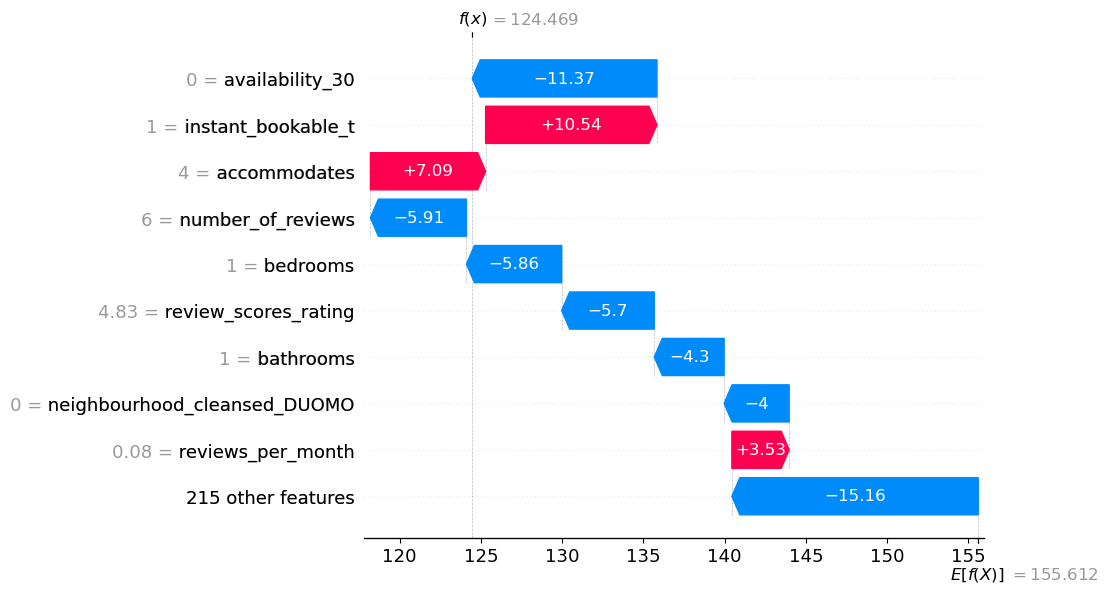

In [133]:
shap.plots.waterfall(shap_values[2])

In [108]:
# visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[0])

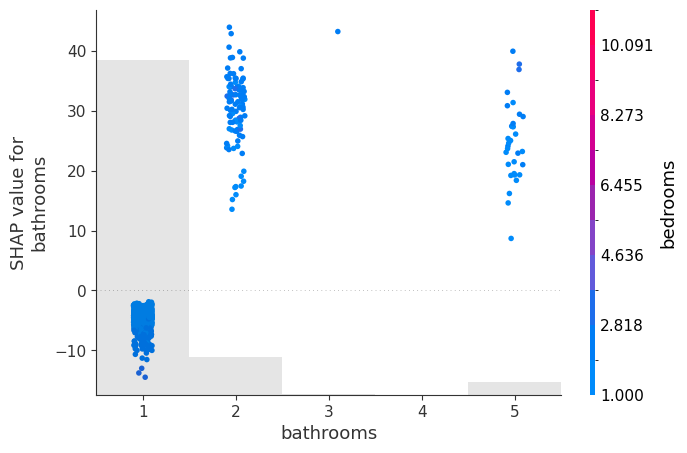

In [134]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:, "bathrooms"], color=shap_values)

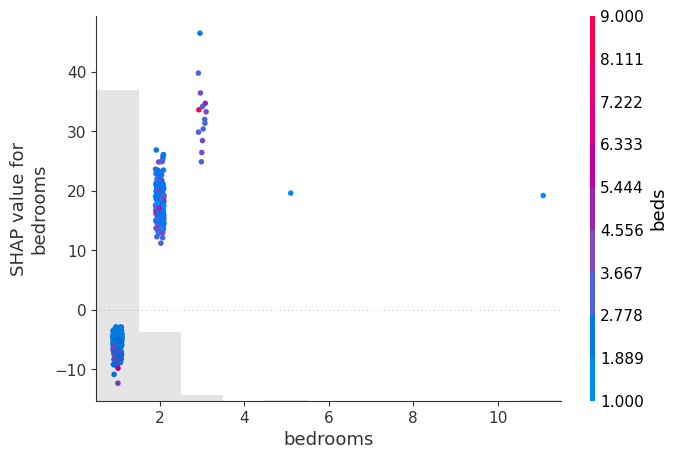

In [135]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:, "bedrooms"], color=shap_values)

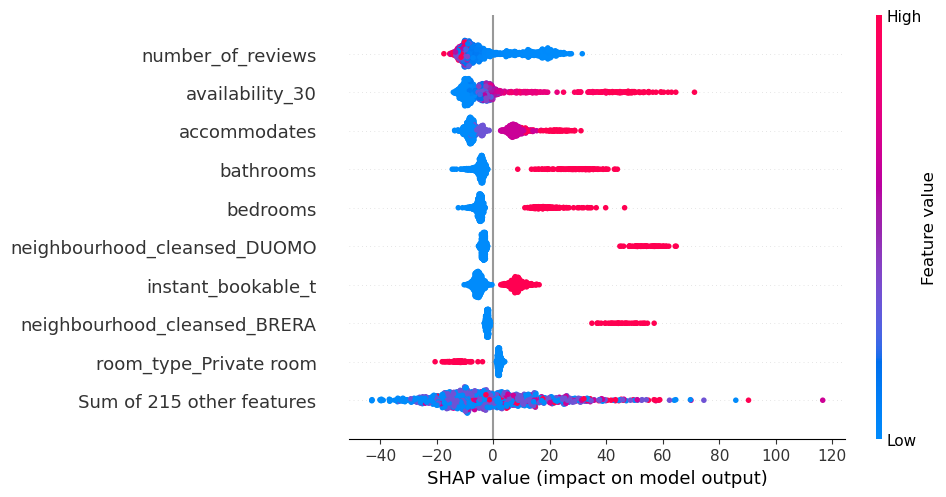

In [136]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

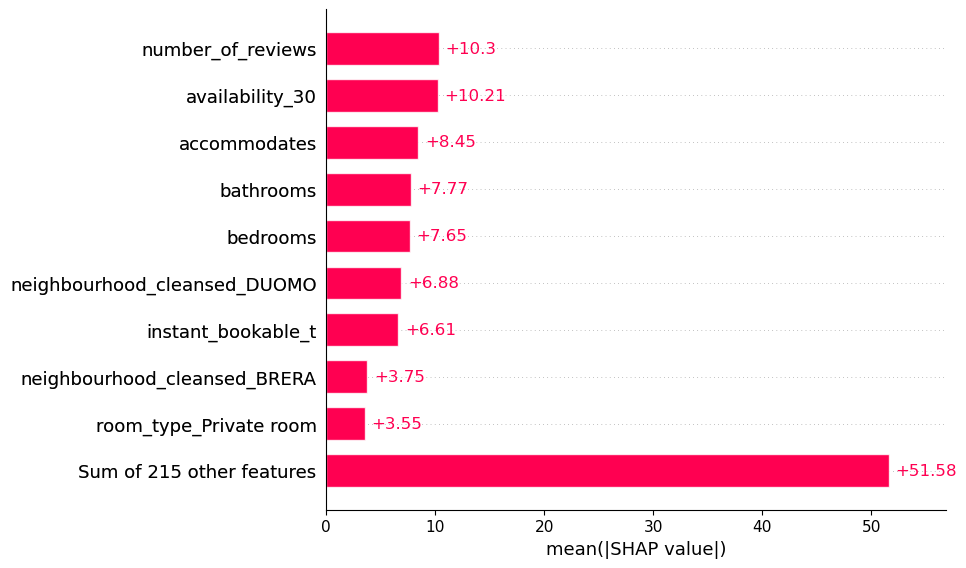

In [137]:
shap.plots.bar(shap_values)

In [125]:
# Compute SHAP values for your data
shap_values = explainer(X_test[:100])

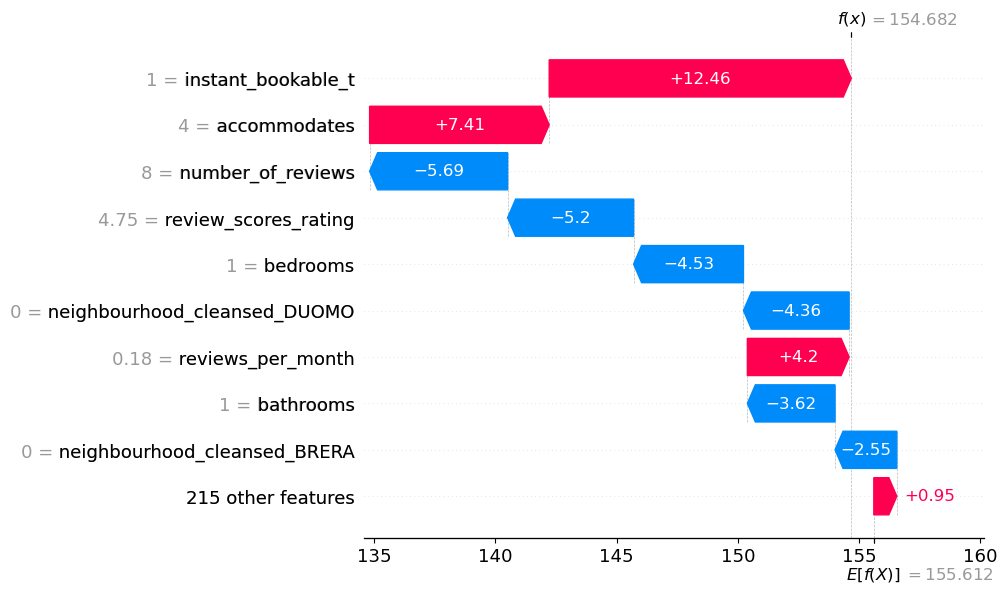

In [127]:
shap.plots.waterfall(shap_values[2])

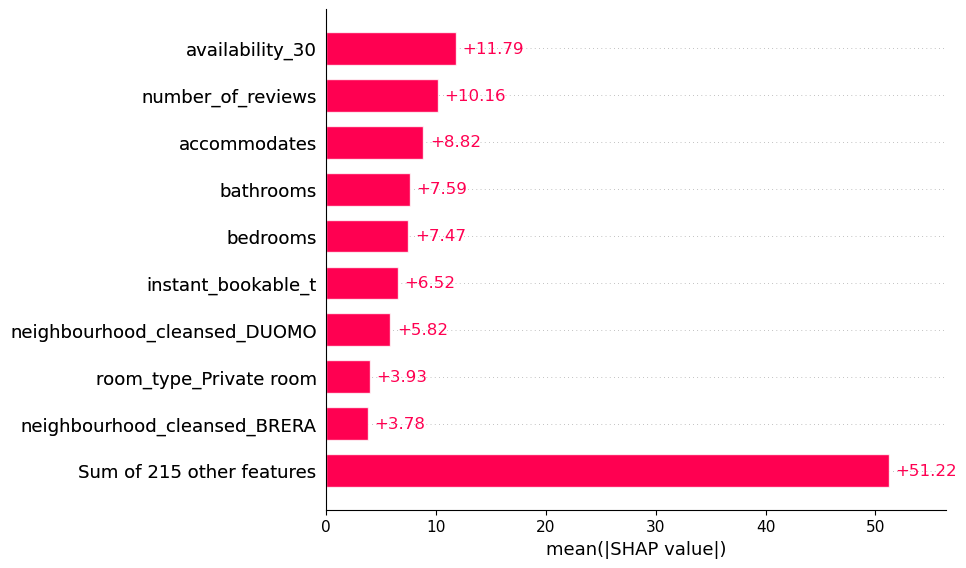

In [128]:
shap.plots.bar(shap_values)

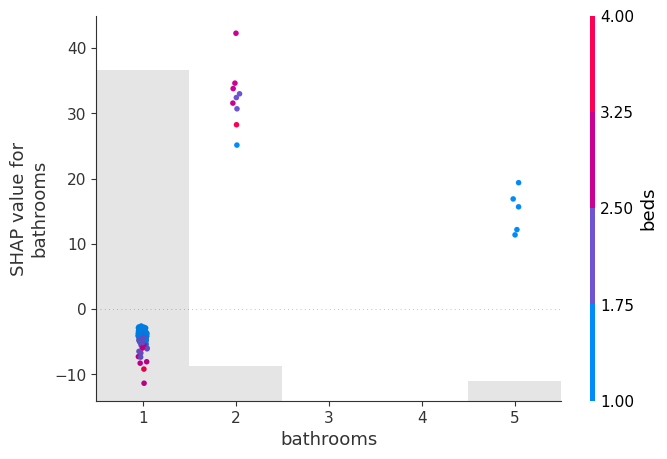

In [129]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:, "bathrooms"], color=shap_values)

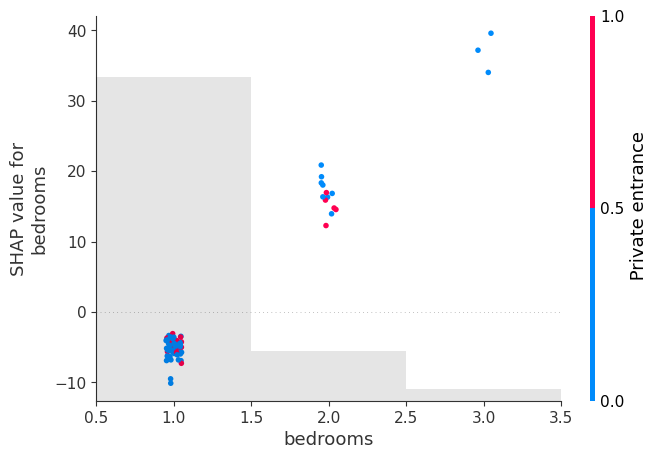

In [130]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:, "bedrooms"], color=shap_values)

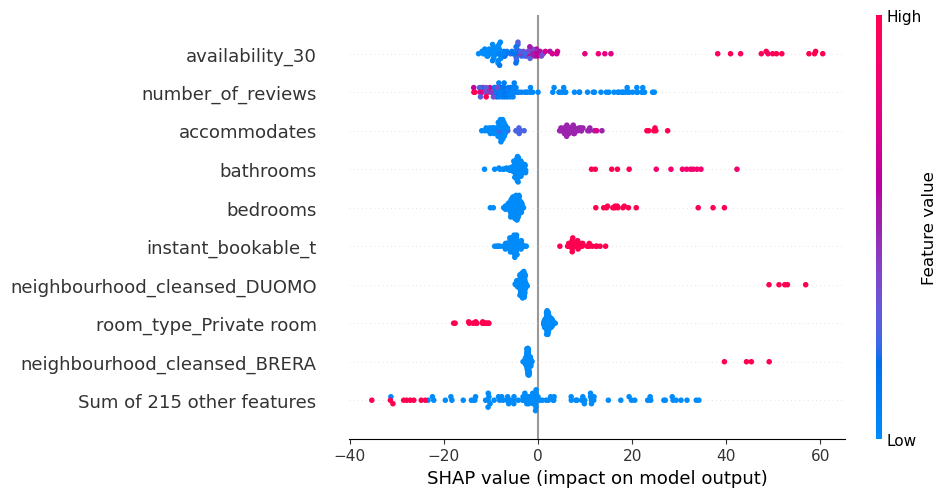

In [131]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)